In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Load your datasets
customers_df = pd.read_csv('Customers.csv')  # Customer attributes like region, signup date
transactions_df = pd.read_csv('Transactions.csv')  # Transaction data

# Display the first few rows of each dataset to understand the structure
customers_df.head(), transactions_df.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  )

In [2]:
# Calculate total spend and purchase frequency for each customer
transactions_df['TotalSpend'] = transactions_df['Quantity'] * transactions_df['Price']  # Total spending per transaction

# Aggregating the data by CustomerID
customer_profiles = transactions_df.groupby('CustomerID').agg(
    total_spend=('TotalSpend', 'sum'),
    purchase_frequency=('TransactionID', 'count')
).reset_index()

# Show the aggregated customer profiles
customer_profiles.head()


,CustomerID,total_spend,purchase_frequency
0,C0001,3354.52,5
1,C0002,1862.74,4
2,C0003,2725.38,4
3,C0004,5354.88,8
4,C0005,2034.24,3


In [3]:
# Merge the customer profiles with customer attributes (e.g., region, signup date)
customer_profiles = pd.merge(customer_profiles, customers_df[['CustomerID', 'Region', 'SignupDate']], on='CustomerID', how='left')

# Display the merged customer profiles
customer_profiles.head()


,CustomerID,total_spend,purchase_frequency,Region,SignupDate
0,C0001,3354.52,5,South America,2022-07-10
1,C0002,1862.74,4,Asia,2022-02-13
2,C0003,2725.38,4,South America,2024-03-07
3,C0004,5354.88,8,South America,2022-10-09
4,C0005,2034.24,3,Asia,2022-08-15


In [4]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Standardizing the features (total_spend and purchase_frequency)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profiles[['total_spend', 'purchase_frequency']])

# Now we will use K-Means for clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # We will initially start with 5 clusters
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the customer profiles with the cluster labels
customer_profiles.head()


,CustomerID,total_spend,purchase_frequency,Region,SignupDate,Cluster
0,C0001,3354.52,5,South America,2022-07-10,3
1,C0002,1862.74,4,Asia,2022-02-13,1
2,C0003,2725.38,4,South America,2024-03-07,1
3,C0004,5354.88,8,South America,2022-10-09,0
4,C0005,2034.24,3,Asia,2022-08-15,1


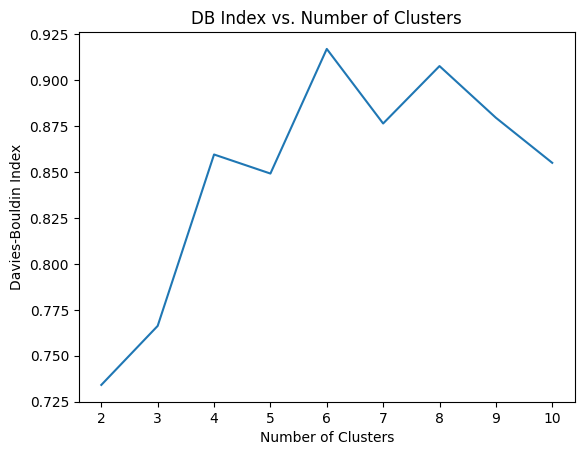

In [5]:
# Finding the optimal number of clusters (2-10)
db_index = []
for k in range(2, 11):  # Checking from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    db_index.append(davies_bouldin_score(scaled_data, kmeans.labels_))

# Plotting the Davies-Bouldin Index for each k
import matplotlib.pyplot as plt

plt.plot(range(2, 11), db_index)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('DB Index vs. Number of Clusters')
plt.show()


In [6]:
# Final clustering with the optimal number of clusters (e.g., 4)
kmeans_final = KMeans(n_clusters=4, random_state=42)
customer_profiles['Cluster'] = kmeans_final.fit_predict(scaled_data)

# Check the final clusters
customer_profiles.head()


,CustomerID,total_spend,purchase_frequency,Region,SignupDate,Cluster
0,C0001,3354.52,5,South America,2022-07-10,3
1,C0002,1862.74,4,Asia,2022-02-13,3
2,C0003,2725.38,4,South America,2024-03-07,3
3,C0004,5354.88,8,South America,2022-10-09,0
4,C0005,2034.24,3,Asia,2022-08-15,1


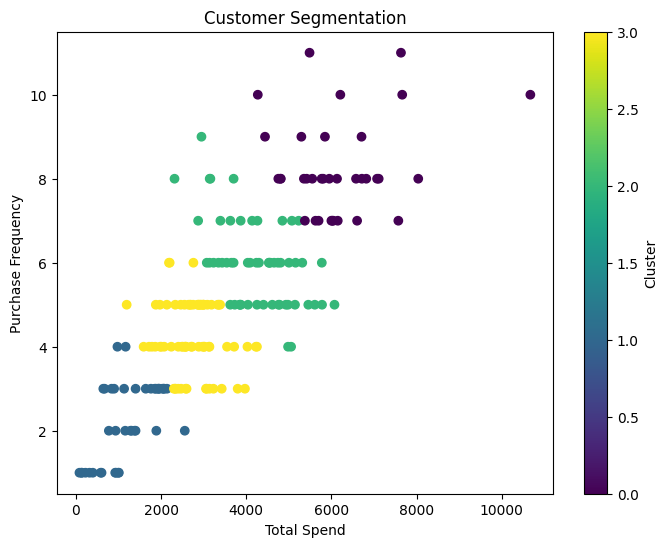

In [7]:
# Plotting the clusters in 2D (total_spend vs. purchase_frequency)
plt.figure(figsize=(8, 6))
plt.scatter(customer_profiles['total_spend'], customer_profiles['purchase_frequency'], c=customer_profiles['Cluster'], cmap='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()


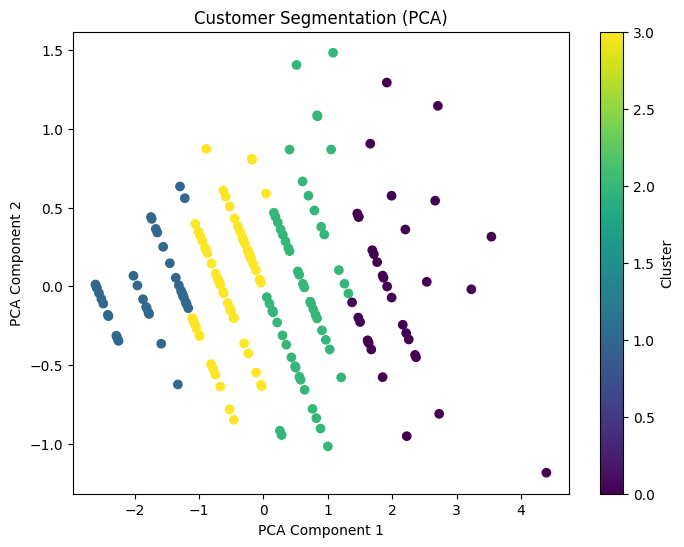

In [8]:
from sklearn.decomposition import PCA

# Perform PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plotting the clusters in 2D after PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_profiles['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation (PCA)')
plt.colorbar(label='Cluster')
plt.show()


In [9]:
# Check the mean values of features for each cluster
cluster_summary = customer_profiles.groupby('Cluster').agg(
    avg_total_spend=('total_spend', 'mean'),
    avg_purchase_frequency=('purchase_frequency', 'mean')
).reset_index()

# Show the cluster summaries
cluster_summary


,Cluster,avg_total_spend,avg_purchase_frequency
0,0,6172.260857,8.257143
1,1,1200.152000,2.225000
2,2,4272.589286,5.964286
3,3,2745.519853,4.235294
